In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10,8))

sns.set(style="whitegrid", color_codes=True)

# load iris dataset
iris = sns.load_dataset("iris")

pandas.core.frame.DataFrame

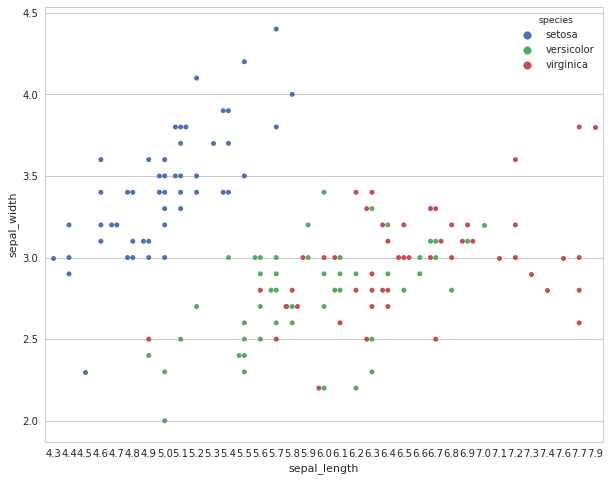

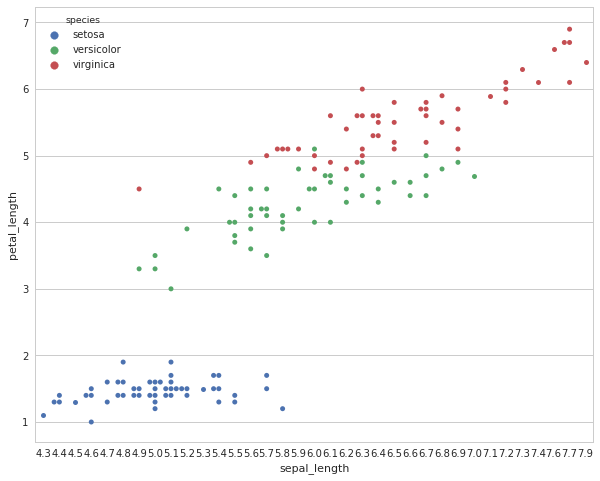

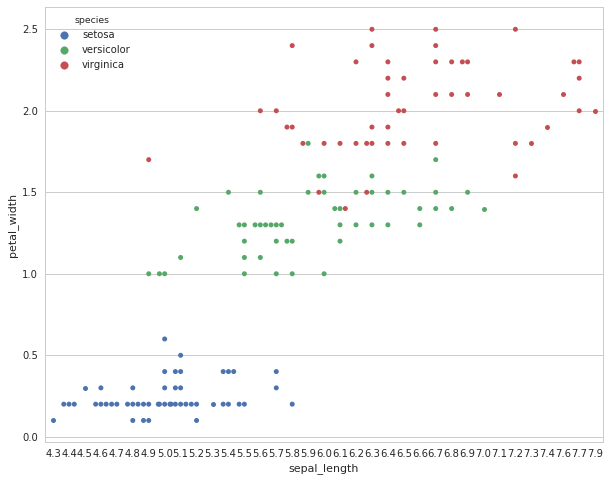

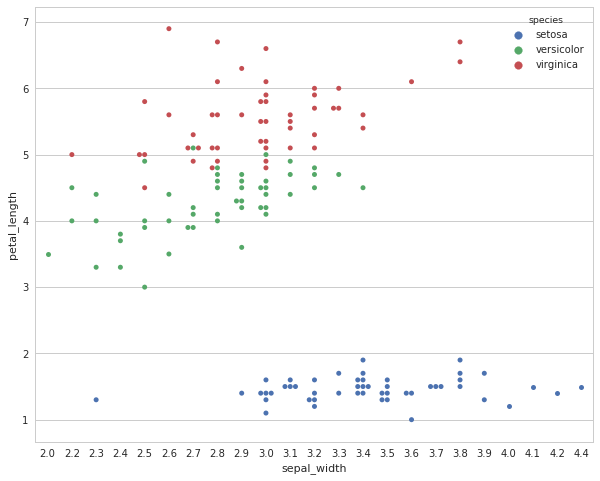

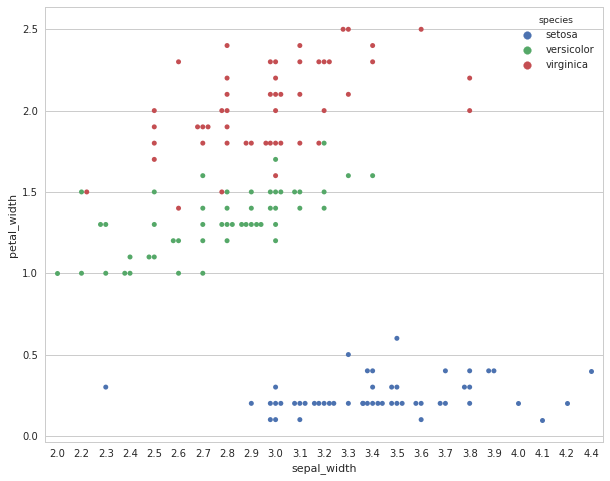

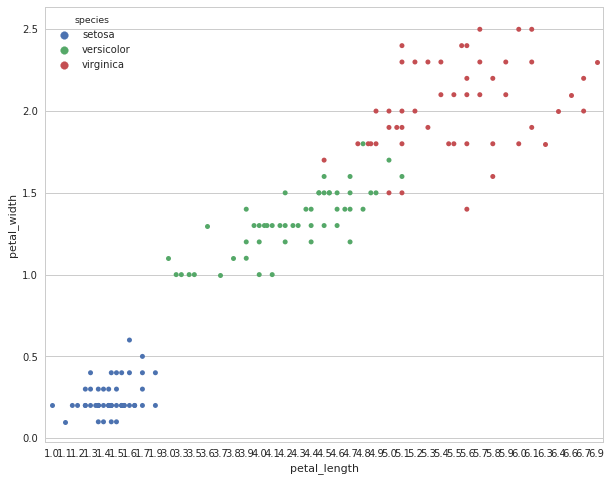

In [3]:
iris
sns.swarmplot(x="sepal_length", y="sepal_width", hue="species", data=iris)
plt.show()

sns.swarmplot(x="sepal_length", y="petal_length", hue="species", data=iris)
plt.show()

sns.swarmplot(x="sepal_length", y="petal_width", hue="species", data=iris)
plt.show()

sns.swarmplot(x="sepal_width", y="petal_length", hue="species", data=iris)
plt.show()

sns.swarmplot(x="sepal_width", y="petal_width", hue="species", data=iris)
plt.show()

sns.swarmplot(x="petal_length", y="petal_width", hue="species", data=iris)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split(iris, test_size=0.3, train_size=0.7, random_state=0)

In [5]:
len(iris_train)

105

In [6]:
len(iris_test)


45

In [14]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=0)
# E.g. clf = clf.fit(iris.data, iris.target)

import numpy as np
iris_train = np.array(iris_train)

# get iris_train data set, take the first 4 columns for train_data
iris_train_data = iris_train[:, 0:4]

# build iris_train_data target, take the last column '5'
iris_train_data_target = iris_train[:, 4:5]

# build model with training_data
clf = clf.fit(iris_train_data, iris_train_data_target)

# iris_train.target = sequence of array of size 105
# iris_data is a tuple, type numpy array and being accessed by shape
print (type(iris_train_data))
print (type(iris_train_data.shape))

print (iris_train_data.shape)
# len (rows) = 105
print (iris_train_data.shape[0] )
# columns = 4
print (iris_train_data.shape[1])

# iris_train_data

<class 'numpy.ndarray'>
<class 'tuple'>
(105, 4)
105
4


In [14]:
# Formating the testing data
iris_test = np.array(iris_test)
iris_test_data = iris_test[:, 0:4]
iris_test_data_target = iris_test[:, 4:5]

# result of testing data
y = np.array([item[0] for item in iris_test_data_target])

# testing data
x = clf.predict(iris_test_data)

# Proof that results are not completely accuracy
for item, item2 in zip(x,y):
    if (item != item2):
        print (item, item2)
        
# Evaluating the model by comparing the real result (y) and result from model (x)
x == y


virginica versicolor


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

In [16]:
# Compute the accuracy = sum_corrected_prediction/ all_prediction * 100 (on Test-Data)
z = x==y
accuracy = ((z==True).sum() / len(z))*100

print (accuracy)

# Compute the accuracy = sum_corrected_prediction/ all_prediction * 100 (on Training-Data)
k1 = clf.predict(iris_train_data)
k2 = np.array([item[0] for item in iris_train_data_target])

z = k2==k1
accuracy = ((z==True).sum() / len(z))*100

print (accuracy)

97.7777777778
100.0


For decision tree in particular: 
Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem 

Use max_depth to control the size of the tree to prevent overfitting. 

(Source: scikit-learn.org/stable/modules/tree.html)

In [9]:
# changing parameter of max_depth 
for i in [1,2,3,4]:
    clf_md = tree.DecisionTreeClassifier(random_state=0, max_depth=i)
    clf_md = clf_md.fit(iris_train_data, iris_train_data_target)
    x = clf_md.predict(iris_test_data)
    print (x == y)
    z = x==y
    accuracy = ((z==True).sum() / len(z))*100
    print (accuracy)
    print ("\n")


[ True False  True  True  True  True  True False False False  True False
 False False False  True False False  True  True  True False  True  True
  True  True  True False False  True  True False  True  True  True False
  True False False False  True  True  True  True  True]
60.0


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True False  True  True  True  True  True  True  True]
91.1111111111


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True]
97.7777777778


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  T

Conclusion: the model has reached the maximal optimised result (97.7777777778) when max_depth >=3

**Task 1.7**

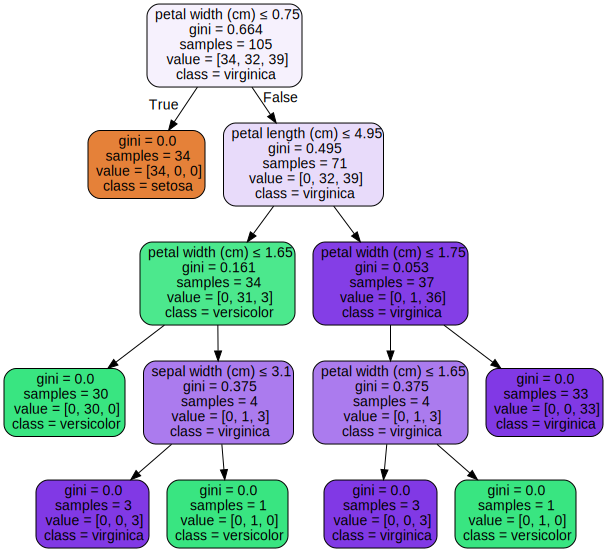

In [10]:
import graphviz

dot_data = tree.export_graphviz(clf_md, out_file=None, 
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris")
graph

<class 'numpy.ndarray'>
[ 0.          0.02150464  0.39766951  0.58082584]


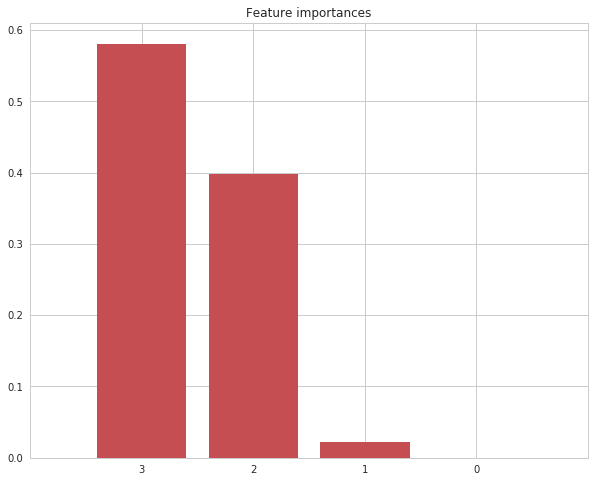

In [11]:
importances = clf_md.feature_importances_
print (type(importances))
print (importances)
indices = np.argsort(importances)[::-1]
# indices = np.array(importances)[::-1]
# indices = sorted(indices)

plt.figure(1)
plt.title("Feature importances")
plt.bar(range(iris_train_data.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(iris_train_data.shape[1]), indices)
plt.xlim([-1, iris_train_data.shape[1]])

plt.show()


Source: scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

[ 0.          0.02150464  0.39766951  0.58082584]


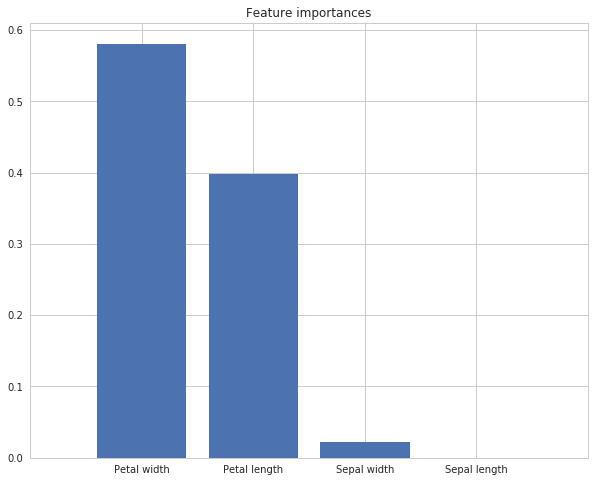

In [19]:
# Feature importances and visual out of model for all data set 
importances = clf.feature_importances_
print (importances)

indices = np.argsort(importances)[::-1]
classify = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
classify.reverse()

plt.figure(2)
plt.title("Feature importances")
plt.bar(range(iris.data.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(iris.data.shape[1]), classify)
plt.xlim([-1, iris.data.shape[1]])

plt.show()